✅ Đã import thành công các thư viện cần thiết
✅ Đã đọc ảnh: boat.jpg
✅ Đã đọc ảnh: kiwi.jpg
✅ Đã đọc ảnh: mountain.jpg
✅ Đã đọc ảnh: pagoda.jpg
✅ Đã đọc ảnh: dudu.jpg
✅ Đã đọc ảnh: duahau.jpg


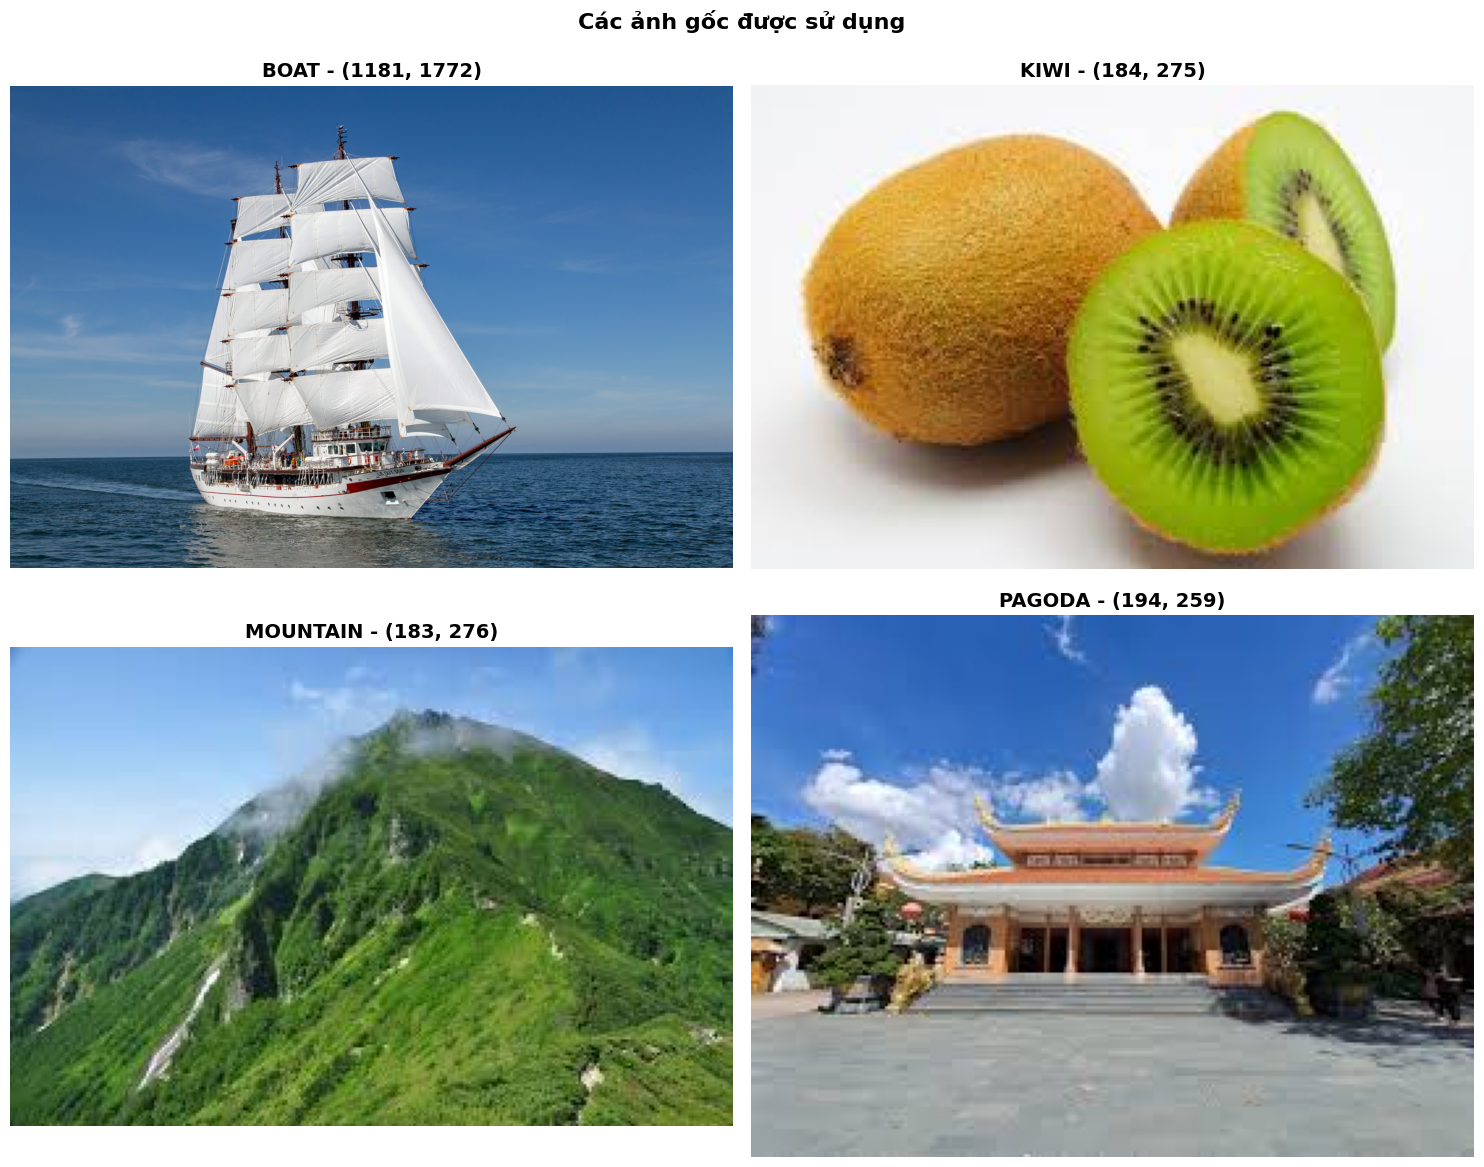

✅ Đã định nghĩa các hàm xử lý ảnh cơ bản
=== BÀI 1: TỊNH TIẾN VÀ HIỆU ỨNG SÓNG ===
✅ Sử dụng ảnh kiwi thực
💾 Đã lưu kết quả: output/kiwi_wave.jpg


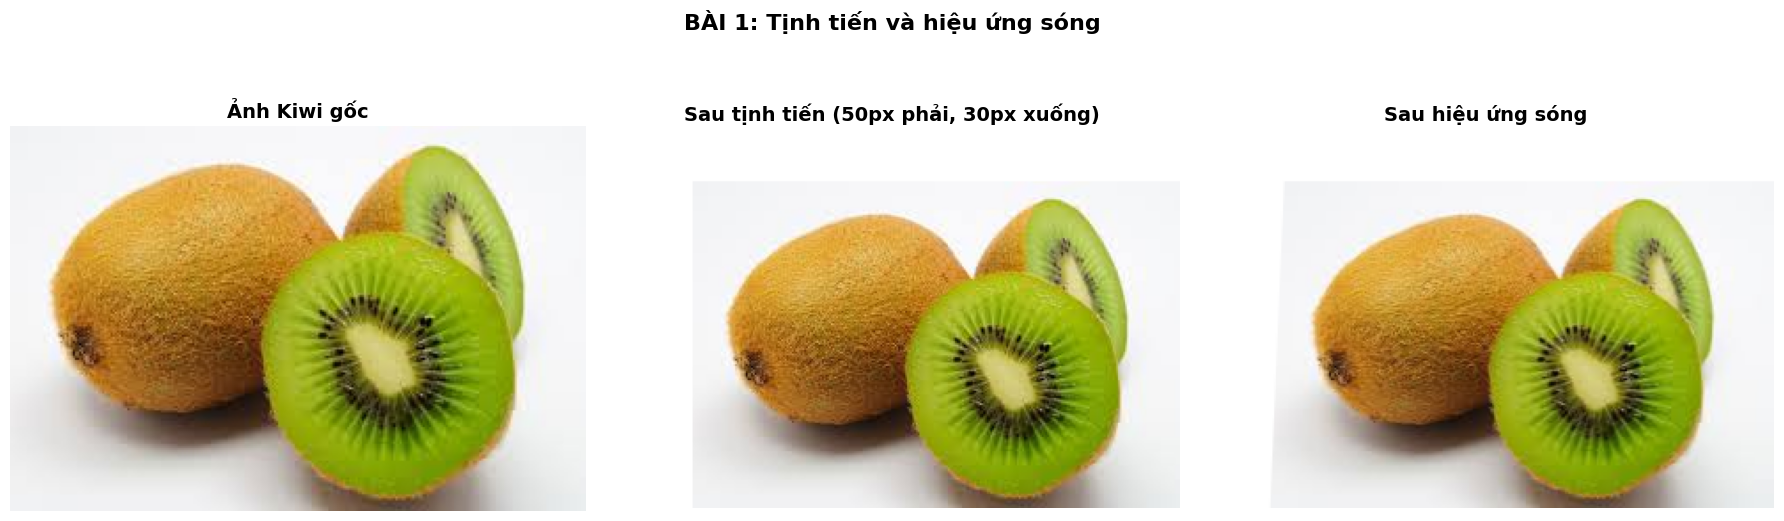


=== BÀI 2: GRADIENT VÀ GHÉP ẢNH ===
✅ Đã đọc ảnh dudu.jpg
✅ Đã đọc ảnh duahau.jpg
💾 Đã lưu kết quả: output/fruits_gradient.png


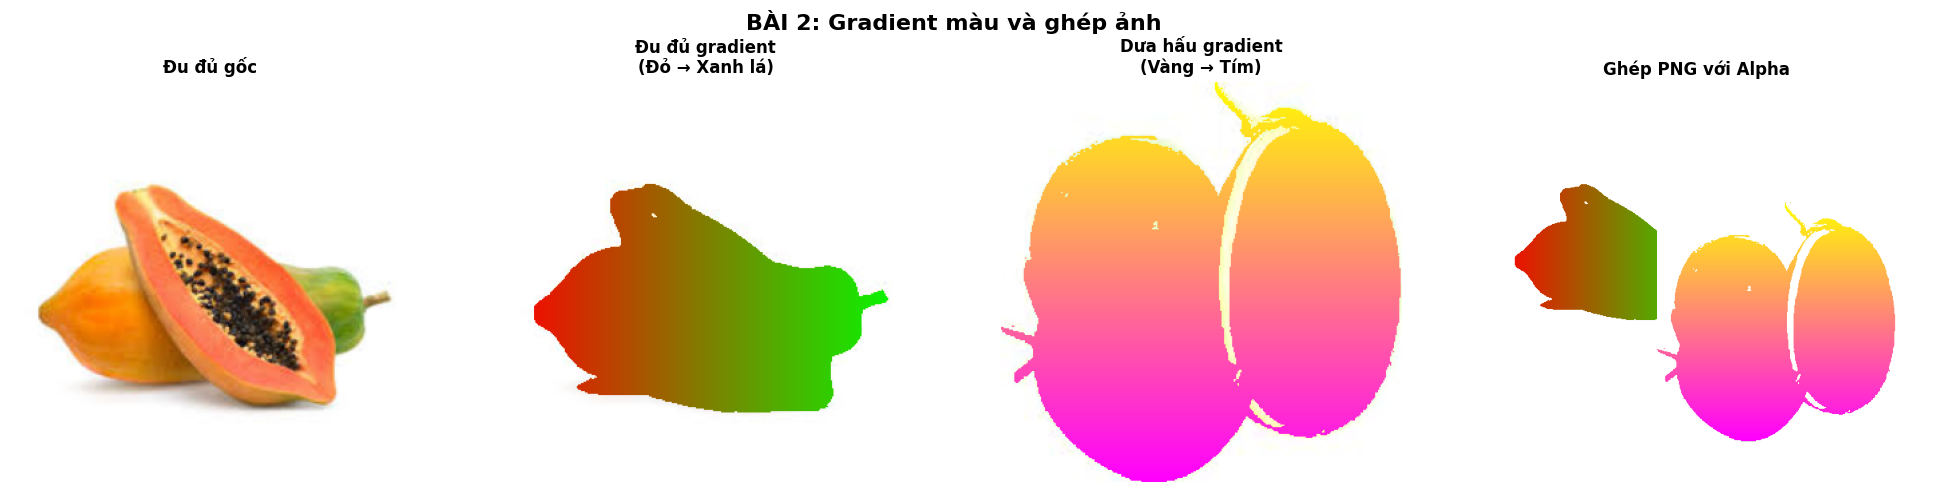


=== BÀI 3: XOAY VÀ PHẢN CHIẾU ===
✅ Sử dụng ảnh núi và thuyền thực
💾 Đã lưu kết quả: output/mountain_boat_mirror.jpg


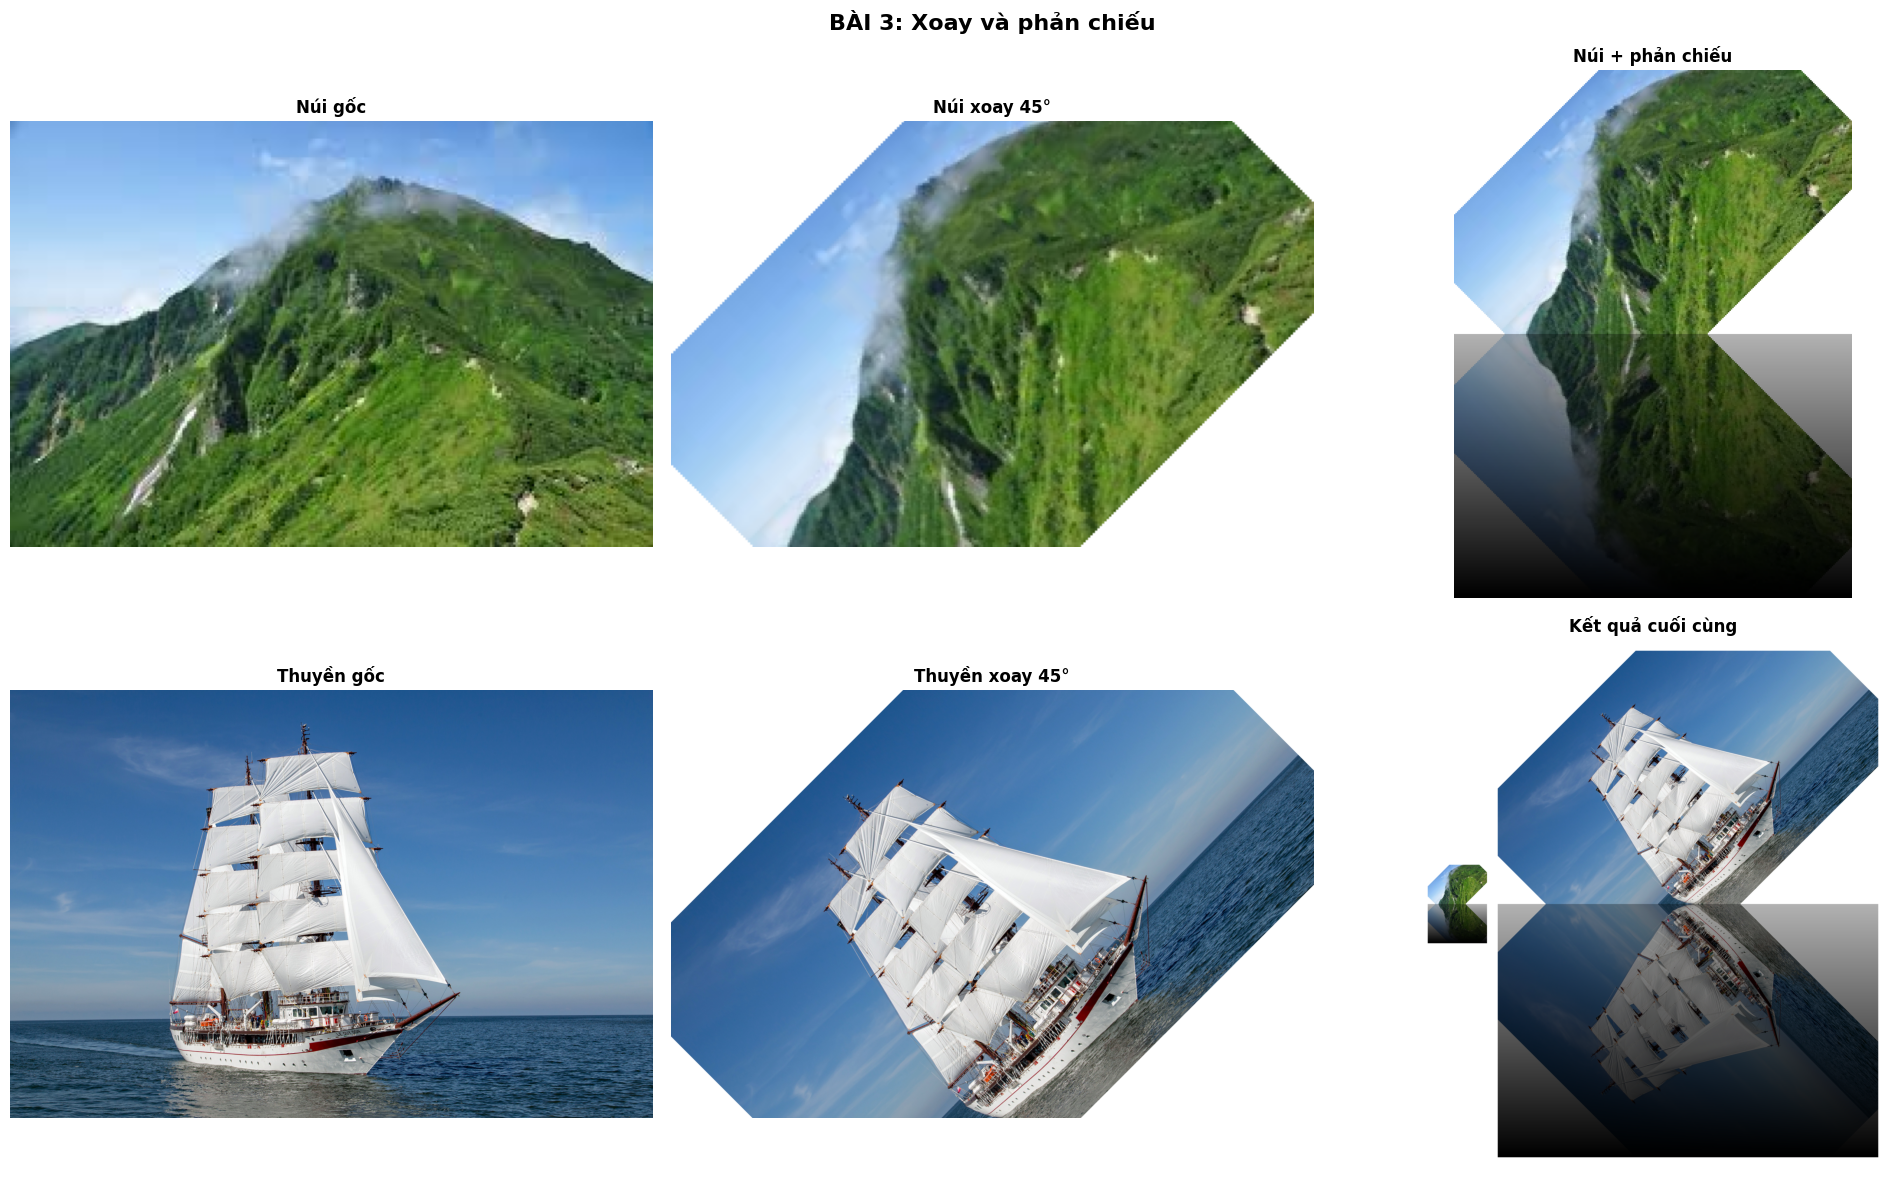


=== BÀI 4: PHÓNG TO VÀ UỐN CONG ===
✅ Sử dụng ảnh chùa thực
💾 Đã lưu kết quả: output/pagoda_warped.jpg


C:\Users\VUHOANG\AppData\Local\Temp\ipykernel_21408\2341897987.py:474: RuntimeWarning: invalid value encountered in divide
  scale = np.where(r_norm > 0, r_distorted / r_norm, 1)


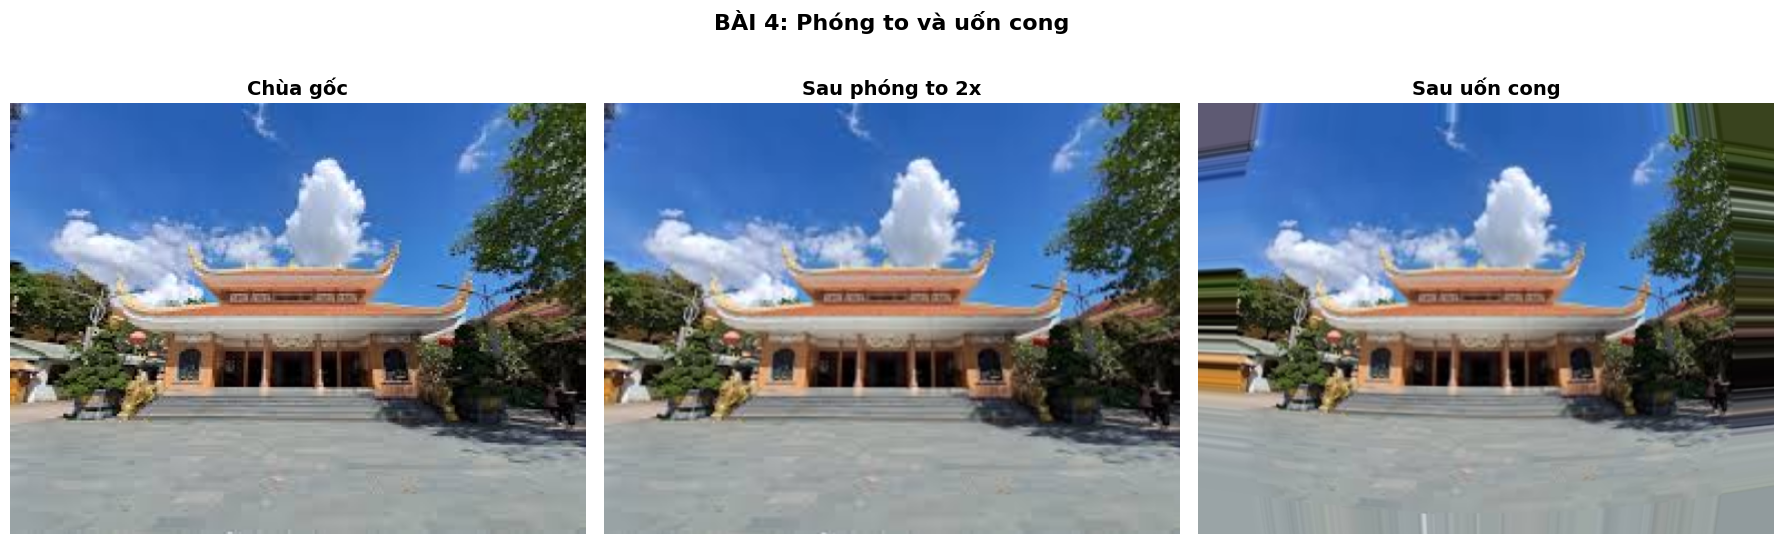


=== BÀI 5: MENU TƯƠNG TÁC ===
📁 Có 6 ảnh trong thư viện

🖼️  CÁC ẢNH CÓ SẴN:
1. BOAT
2. KIWI
3. MOUNTAIN


In [ ]:
# %% [markdown]
# # Bài tập xử lý ảnh với Python
# ## Sử dụng OpenCV, NumPy, SciPy và các thư viện khác

# %%
# Import các thư viện cần thiết
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates, rotate, zoom, gaussian_filter
from scipy import ndimage
import os
from PIL import Image
import io

# Thiết lập hiển thị matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Tạo thư mục output nếu chưa có
if not os.path.exists('output'):
    os.makedirs('output')

print("✅ Đã import thành công các thư viện cần thiết")

# %%
# Đọc các ảnh thực từ file đã upload
def load_images():
    """Đọc các ảnh thực từ file"""
    images = {}
    
    # Thử đọc các ảnh từ file
    image_files = {
        'boat': 'boat.jpg',
        'kiwi': 'kiwi.jpg', 
        'mountain': 'mountain.jpg',
        'pagoda': 'pagoda.jpg',
        'dudu' : 'dudu.jpg',
        'duahau': 'duahau.jpg',
    }
    
    for name, filename in image_files.items():
        try:
            if os.path.exists(filename):
                img = cv2.imread(filename)
                if img is not None:
                    images[name] = img
                    print(f"✅ Đã đọc ảnh: {filename}")
                else:
                    print(f"❌ Không thể đọc ảnh: {filename}")
            else:
                print(f"❌ Không tìm thấy file: {filename}")
        except Exception as e:
            print(f"❌ Lỗi khi đọc {filename}: {e}")
    
    return images

# Tải các ảnh
images = load_images()

# Hiển thị các ảnh đã tải
if images:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for i, (name, img) in enumerate(images.items()):
        if i < 4:
            axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[i].set_title(f'{name.upper()} - {img.shape[:2]}', fontsize=14, fontweight='bold')
            axes[i].axis('off')
    
    plt.suptitle('Các ảnh gốc được sử dụng', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Không có ảnh nào được tải. Tạo ảnh mẫu...")

# %% [markdown]
# ## Các hàm xử lý ảnh cơ bản

# %%
def translate_image(img, dx, dy):
    """Tịnh tiến ảnh theo vector (dx, dy)"""
    h, w = img.shape[:2]
    # Tạo ma trận biến đổi affine
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    # Áp dụng biến đổi với kích thước mới
    translated = cv2.warpAffine(img, M, (w + abs(dx), h + abs(dy)), 
                               borderMode=cv2.BORDER_CONSTANT, borderValue=(255,255,255))
    return translated

def wave_effect(img, amplitude=20, frequency=0.1, direction='horizontal'):
    """Tạo hiệu ứng sóng bằng map_coordinates"""
    h, w = img.shape[:2]
    
    # Tạo lưới tọa độ
    x, y = np.meshgrid(np.arange(w), np.arange(h))
    
    # Áp dụng biến đổi sóng
    if direction == 'horizontal':
        x_wave = x + amplitude * np.sin(2 * np.pi * frequency * y / h)
        y_wave = y
    else:  # vertical
        x_wave = x
        y_wave = y + amplitude * np.sin(2 * np.pi * frequency * x / w)
    
    # Đảm bảo tọa độ nằm trong phạm vi hợp lệ
    x_wave = np.clip(x_wave, 0, w-1)
    y_wave = np.clip(y_wave, 0, h-1)
    
    # Áp dụng biến đổi cho từng kênh màu
    if len(img.shape) == 3:
        result = np.zeros_like(img)
        for i in range(img.shape[2]):
            result[:,:,i] = map_coordinates(img[:,:,i], [y_wave, x_wave], 
                                          order=1, mode='constant', cval=255)
    else:
        result = map_coordinates(img, [y_wave, x_wave], order=1, mode='constant', cval=255)
    
    return result.astype(np.uint8)

def apply_gradient(img, color1, color2, direction='horizontal'):
    """Áp dụng gradient màu lên ảnh"""
    h, w = img.shape[:2]
    
    # Tạo mask gradient
    if direction == 'horizontal':
        gradient = np.linspace(0, 1, w).reshape(1, -1)
        gradient = np.repeat(gradient, h, axis=0)
    else:  # vertical
        gradient = np.linspace(0, 1, h).reshape(-1, 1)
        gradient = np.repeat(gradient, w, axis=1)
    
    # Tạo ảnh gradient
    gradient_img = np.zeros((h, w, 3), dtype=np.uint8)
    for i in range(3):
        gradient_img[:,:,i] = (1 - gradient) * color1[i] + gradient * color2[i]
    
    # Tạo mask từ ảnh gốc (vùng không trắng)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask = gray < 240  # Loại bỏ vùng trắng
    
    # Áp dụng gradient chỉ lên vùng đối tượng
    result = img.copy()
    result[mask] = gradient_img[mask]
    
    return result

def rotate_image_scipy(img, angle, reshape=False):
    """Xoay ảnh với góc cho trước sử dụng scipy"""
    # Xoay từng kênh màu
    if len(img.shape) == 3:
        rotated = np.zeros_like(img)
        for i in range(img.shape[2]):
            rotated[:,:,i] = rotate(img[:,:,i], angle, reshape=reshape, 
                                  mode='constant', cval=255, order=1)
    else:
        rotated = rotate(img, angle, reshape=reshape, mode='constant', cval=255, order=1)
    
    return rotated.astype(np.uint8)

def zoom_image_scipy(img, factor):
    """Phóng to ảnh với hệ số cho trước"""
    if len(img.shape) == 3:
        return zoom(img, (factor, factor, 1), order=1, mode='constant', cval=255).astype(np.uint8)
    else:
        return zoom(img, (factor, factor), order=1, mode='constant', cval=255).astype(np.uint8)

print("✅ Đã định nghĩa các hàm xử lý ảnh cơ bản")

# %% [markdown]
# ## Bài 1: Tịnh tiến và hiệu ứng sóng cho ảnh kiwi

# %%
print("=== BÀI 1: TỊNH TIẾN VÀ HIỆU ỨNG SÓNG ===")

# Sử dụng ảnh kiwi nếu có, không thì tạo ảnh mẫu
if 'kiwi' in images:
    kiwi_img = images['kiwi'].copy()
    print("✅ Sử dụng ảnh kiwi thực")
else:
    # Tạo ảnh mẫu kiwi
    kiwi_img = np.full((300, 300, 3), (101, 67, 33), dtype=np.uint8)
    center = (150, 150)
    cv2.circle(kiwi_img, center, 80, (255, 255, 255), -1)
    cv2.circle(kiwi_img, center, 60, (101, 67, 33), -1)
    cv2.putText(kiwi_img, "KIWI", (center[0]-40, center[1]), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    print("⚠️ Tạo ảnh kiwi mẫu")

# Bước 1: Tịnh tiến 50 pixel sang phải, 30 pixel xuống dưới
kiwi_translated = translate_image(kiwi_img, 50, 30)

# Bước 2: Áp dụng hiệu ứng sóng
kiwi_wave = wave_effect(kiwi_translated, amplitude=30, frequency=0.05)

# Lưu kết quả
cv2.imwrite('output/kiwi_wave.jpg', kiwi_wave)
print("💾 Đã lưu kết quả: output/kiwi_wave.jpg")

# Hiển thị kết quả
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(kiwi_img, cv2.COLOR_BGR2RGB))
plt.title('Ảnh Kiwi gốc', fontsize=14, fontweight='bold')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(kiwi_translated, cv2.COLOR_BGR2RGB))
plt.title('Sau tịnh tiến (50px phải, 30px xuống)', fontsize=14, fontweight='bold')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(kiwi_wave, cv2.COLOR_BGR2RGB))
plt.title('Sau hiệu ứng sóng', fontsize=14, fontweight='bold')
plt.axis('off')

plt.suptitle('BÀI 1: Tịnh tiến và hiệu ứng sóng', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## Bài 2: Đổi màu gradient và ghép ảnh

# %%
print("\n=== BÀI 2: GRADIENT VÀ GHÉP ẢNH ===")

def create_fruit_image(name, color, size=(300, 300)):
    """Tạo ảnh trái cây mẫu"""
    img = np.full((size[1], size[0], 3), (255, 255, 255), dtype=np.uint8)
    
    # Vẽ hình oval để tạo trái cây
    center = (size[0]//2, size[1]//2)
    axes_length = (size[0]//3, size[1]//4)
    cv2.ellipse(img, center, axes_length, 0, 0, 360, color, -1)
    
    # Thêm text
    cv2.putText(img, name, (center[0]-len(name)*10, center[1]), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    
    return img

# Đọc ảnh đu đủ và dưa hấu từ file nếu có, nếu không thì tạo ảnh mẫu
if os.path.exists('dudu.jpg'):
    papaya_img = cv2.imread('dudu.jpg')
    papaya_img = cv2.resize(papaya_img, (300, 300))
    print("✅ Đã đọc ảnh dudu.jpg")
else:
    papaya_img = create_fruit_image("PAPAYA", (0, 165, 255))
    print("⚠️ Không tìm thấy ảnh dudu.jpg → Dùng ảnh mẫu")

if os.path.exists('duahau.jpg'):
    watermelon_img = cv2.imread('duahau.jpg')
    watermelon_img = cv2.resize(watermelon_img, (300, 300))
    print("✅ Đã đọc ảnh duahau.jpg")
else:
    watermelon_img = create_fruit_image("WATERMELON", (0, 128, 0))
    print("⚠️ Không tìm thấy ảnh duahau.jpg → Dùng ảnh mẫu")

# Đổi màu ảnh bằng gradient
papaya_gradient = apply_gradient(papaya_img, (0, 0, 255), (0, 255, 0), 'horizontal')
watermelon_gradient = apply_gradient(watermelon_img, (0, 255, 255), (255, 0, 255), 'vertical')

# Hàm ghép ảnh với alpha channel
def combine_images_with_alpha(img1, img2):
    """Ghép hai ảnh và tạo PNG với alpha channel"""
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    
    canvas_w = max(w1, w2) + 300
    canvas_h = max(h1, h2) + 200
    result = np.zeros((canvas_h, canvas_w, 4), dtype=np.uint8)
    
    # Ảnh 1
    x1, y1 = 50, 50
    rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    mask1 = gray1 < 240
    result[y1:y1+h1, x1:x1+w1, :3] = rgb1
    result[y1:y1+h1, x1:x1+w1, 3] = np.where(mask1, 255, 0)

    # Ảnh 2
    x2, y2 = canvas_w - w2 - 50, canvas_h - h2 - 50
    rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    mask2 = gray2 < 240
    result[y2:y2+h2, x2:x2+w2, :3] = rgb2
    result[y2:y2+h2, x2:x2+w2, 3] = np.where(mask2, 255, 0)

    return result

# Ghép ảnh
combined_png = combine_images_with_alpha(papaya_gradient, watermelon_gradient)

# Lưu PNG
Image.fromarray(combined_png, 'RGBA').save('output/fruits_gradient.png')
print("💾 Đã lưu kết quả: output/fruits_gradient.png")

# Hiển thị
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(papaya_img, cv2.COLOR_BGR2RGB))
plt.title('Đu đủ gốc', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(papaya_gradient, cv2.COLOR_BGR2RGB))
plt.title('Đu đủ gradient\n(Đỏ → Xanh lá)', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(watermelon_gradient, cv2.COLOR_BGR2RGB))
plt.title('Dưa hấu gradient\n(Vàng → Tím)', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(combined_png)
plt.title('Ghép PNG với Alpha', fontsize=12, fontweight='bold')
plt.axis('off')

plt.suptitle('BÀI 2: Gradient màu và ghép ảnh', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# %% [markdown]
# ## Bài 3: Xoay và tạo hiệu ứng phản chiếu

# %%
print("\n=== BÀI 3: XOAY VÀ PHẢN CHIẾU ===")

def vertical_mirror(img):
    """Tạo hiệu ứng phản chiếu dọc"""
    h, w = img.shape[:2]
    
    # Tạo ảnh phản chiếu (lật theo chiều dọc)
    mirrored = cv2.flip(img, 0)
    
    # Tạo gradient để làm mờ dần phần phản chiếu
    gradient = np.linspace(0.7, 0, h).reshape(-1, 1, 1)
    gradient = np.repeat(gradient, w, axis=1)
    if len(img.shape) == 3:
        gradient = np.repeat(gradient, 3, axis=2)
    
    # Áp dụng gradient lên ảnh phản chiếu
    mirrored_faded = (mirrored * gradient).astype(np.uint8)
    
    # Ghép ảnh gốc và phản chiếu
    result = np.vstack([img, mirrored_faded])
    
    return result

# Sử dụng ảnh thực nếu có
if 'mountain' in images and 'boat' in images:
    mountain_img = images['mountain'].copy()
    boat_img = images['boat'].copy()
    print("✅ Sử dụng ảnh núi và thuyền thực")
else:
    # Tạo ảnh mẫu
    mountain_img = np.full((300, 400, 3), (128, 128, 128), dtype=np.uint8)
    # Vẽ hình núi
    points = np.array([[0, 300], [200, 50], [400, 300]], np.int32)
    cv2.fillPoly(mountain_img, [points], (100, 100, 100))
    cv2.putText(mountain_img, "MOUNTAIN", (120, 200), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    boat_img = np.full((200, 300, 3), (42, 42, 165), dtype=np.uint8)
    # Vẽ hình thuyền
    cv2.ellipse(boat_img, (150, 120), (100, 30), 0, 0, 360, (165, 42, 42), -1)
    cv2.putText(boat_img, "BOAT", (120, 130), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    print("⚠️ Tạo ảnh núi và thuyền mẫu")

# Xoay 45 độ, giữ kích thước ban đầu
mountain_rotated = rotate_image_scipy(mountain_img, 45, reshape=False)
boat_rotated = rotate_image_scipy(boat_img, 45, reshape=False)

# Tạo hiệu ứng phản chiếu dọc
mountain_mirror = vertical_mirror(mountain_rotated)
boat_mirror = vertical_mirror(boat_rotated)

# Ghép lên canvas trắng
def combine_on_white_canvas(img1, img2):
    """Ghép hai ảnh lên canvas trắng"""
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    
    # Tạo canvas trắng
    canvas_w = w1 + w2 + 150
    canvas_h = max(h1, h2) + 100
    canvas = np.full((canvas_h, canvas_w, 3), 255, dtype=np.uint8)
    
    # Đặt ảnh 1
    y1 = (canvas_h - h1) // 2
    canvas[y1:y1+h1, 50:50+w1] = img1
    
    # Đặt ảnh 2
    y2 = (canvas_h - h2) // 2
    canvas[y2:y2+h2, w1+100:w1+100+w2] = img2
    
    return canvas

final_canvas = combine_on_white_canvas(mountain_mirror, boat_mirror)

# Lưu kết quả
cv2.imwrite('output/mountain_boat_mirror.jpg', final_canvas)
print("💾 Đã lưu kết quả: output/mountain_boat_mirror.jpg")

# Hiển thị kết quả
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(mountain_img, cv2.COLOR_BGR2RGB))
plt.title('Núi gốc', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(mountain_rotated, cv2.COLOR_BGR2RGB))
plt.title('Núi xoay 45°', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(mountain_mirror, cv2.COLOR_BGR2RGB))
plt.title('Núi + phản chiếu', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(boat_img, cv2.COLOR_BGR2RGB))
plt.title('Thuyền gốc', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(boat_rotated, cv2.COLOR_BGR2RGB))
plt.title('Thuyền xoay 45°', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(final_canvas, cv2.COLOR_BGR2RGB))
plt.title('Kết quả cuối cùng', fontsize=12, fontweight='bold')
plt.axis('off')

plt.suptitle('BÀI 3: Xoay và phản chiếu', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## Bài 4: Phóng to và biến đổi uốn cong

# %%
print("\n=== BÀI 4: PHÓNG TO VÀ UỐN CONG ===")

def warp_transform(img, strength=0.5):
    """Tạo hiệu ứng uốn cong tùy chỉnh (barrel distortion)"""
    h, w = img.shape[:2]
    
    # Tạo lưới tọa độ
    x, y = np.meshgrid(np.arange(w), np.arange(h))
    
    # Tạo biến đổi uốn cong
    center_x, center_y = w // 2, h // 2
    
    # Tính khoảng cách từ tâm
    dx = x - center_x
    dy = y - center_y
    r = np.sqrt(dx**2 + dy**2)
    
    # Chuẩn hóa bán kính
    max_r = np.sqrt(center_x**2 + center_y**2)
    r_norm = np.where(max_r > 0, r / max_r, 0)
    
    # Áp dụng biến đổi uốn cong
    r_distorted = r_norm * (1 + strength * r_norm**2)
    
    # Tính tọa độ mới
    scale = np.where(r_norm > 0, r_distorted / r_norm, 1)
    x_new = center_x + dx * scale
    y_new = center_y + dy * scale
    
    # Đảm bảo tọa độ trong phạm vi hợp lệ
    x_new = np.clip(x_new, 0, w-1)
    y_new = np.clip(y_new, 0, h-1)
    
    # Áp dụng biến đổi
    if len(img.shape) == 3:
        result = np.zeros_like(img)
        for i in range(img.shape[2]):
            result[:,:,i] = map_coordinates(img[:,:,i], [y_new, x_new], 
                                          order=1, mode='constant', cval=255)
    else:
        result = map_coordinates(img, [y_new, x_new], order=1, mode='constant', cval=255)
    
    return result.astype(np.uint8)

# Sử dụng ảnh chùa nếu có
if 'pagoda' in images:
    pagoda_img = images['pagoda'].copy()
    print("✅ Sử dụng ảnh chùa thực")
else:
    # Tạo ảnh chùa mẫu
    pagoda_img = np.full((350, 350, 3), (255, 255, 255), dtype=np.uint8)
    # Vẽ hình chùa đơn giản
    cv2.rectangle(pagoda_img, (125, 200), (225, 300), (0, 215, 255), -1)
    # Mái chùa
    points = np.array([[100, 200], [175, 150], [250, 200]], np.int32)
    cv2.fillPoly(pagoda_img, [points], (200, 100, 0))
    cv2.putText(pagoda_img, "PAGODA", (130, 250), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    print("⚠️ Tạo ảnh chùa mẫu")

# Phóng to 2 lần (thay vì 5 lần để tránh ảnh quá lớn)
pagoda_zoomed = zoom_image_scipy(pagoda_img, 2.0)

# Áp dụng biến đổi uốn cong
pagoda_warped = warp_transform(pagoda_zoomed, strength=0.3)

# Lưu kết quả
cv2.imwrite('output/pagoda_warped.jpg', pagoda_warped)
print("💾 Đã lưu kết quả: output/pagoda_warped.jpg")

# Hiển thị kết quả
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(pagoda_img, cv2.COLOR_BGR2RGB))
plt.title('Chùa gốc', fontsize=14, fontweight='bold')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(pagoda_zoomed, cv2.COLOR_BGR2RGB))
plt.title('Sau phóng to 2x', fontsize=14, fontweight='bold')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(pagoda_warped, cv2.COLOR_BGR2RGB))
plt.title('Sau uốn cong', fontsize=14, fontweight='bold')
plt.axis('off')

plt.suptitle('BÀI 4: Phóng to và uốn cong', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## Bài 5: Menu tương tác

# %%
class ImageProcessor:
    def __init__(self):
        self.images = {}
        self.load_available_images()
        self.current_image = None
        self.original_image = None
        
    def load_available_images(self):
        """Tải các ảnh có sẵn"""
        global images
        if images:
            self.images = {str(i+1): (name, img) for i, (name, img) in enumerate(images.items())}
        
        # Thêm ảnh đã tạo
        if os.path.exists('kiwi.jpg'):
            kiwi = cv2.imread('kiwi.jpg')
            if kiwi is not None:
                self.images['5'] = ('kiwi_file', kiwi)
        
        print(f"📁 Có {len(self.images)} ảnh trong thư viện")
        
    def show_available_images(self):
        """Hiển thị các ảnh có sẵn"""
        if not self.images:
            print("❌ Không có ảnh nào trong thư viện")
            return
            
        print("\n🖼️  CÁC ẢNH CÓ SẴN:")
        for idx, (key, (name, _)) in enumerate(self.images.items(), 1):
            print(f"{key}. {name.upper()}")

    def select_image(self):
        """Chọn ảnh từ thư viện"""
        self.show_available_images()
        choice = input("🔢 Nhập số thứ tự ảnh muốn chọn: ")
        if choice in self.images:
            name, img = self.images[choice]
            self.original_image = img.copy()
            self.current_image = img.copy()
            print(f"✅ Đã chọn ảnh: {name}")
        else:
            print("❌ Lựa chọn không hợp lệ.")

    def reset_image(self):
        """Khôi phục ảnh về trạng thái ban đầu"""
        if self.original_image is not None:
            self.current_image = self.original_image.copy()
            print("🔄 Đã reset ảnh về ban đầu.")
        else:
            print("⚠️ Chưa chọn ảnh nào để reset.")

    def show_image(self):
        """Hiển thị ảnh hiện tại"""
        if self.current_image is not None:
            plt.imshow(cv2.cvtColor(self.current_image, cv2.COLOR_BGR2RGB))
            plt.title("Ảnh hiện tại")
            plt.axis('off')
            plt.show()
        else:
            print("⚠️ Chưa có ảnh để hiển thị.")

    def apply_translation(self):
        dx = int(input("➡️ Nhập số pixel dịch theo trục X: "))
        dy = int(input("⬇️ Nhập số pixel dịch theo trục Y: "))
        self.current_image = translate_image(self.current_image, dx, dy)
        print("✅ Đã tịnh tiến ảnh.")

    def apply_rotation(self):
        angle = float(input("⤵️ Nhập góc xoay (độ): "))
        reshape = input("Giữ kích thước ban đầu? (y/n): ").lower() == 'n'
        self.current_image = rotate_image_scipy(self.current_image, angle, reshape=reshape)
        print("✅ Đã xoay ảnh.")

    def apply_zoom(self):
        factor = float(input("🔍 Nhập hệ số zoom (ví dụ: 1.5 hoặc 0.8): "))
        self.current_image = zoom_image_scipy(self.current_image, factor)
        print("✅ Đã phóng to / thu nhỏ ảnh.")

    def apply_blur(self):
        sigma = float(input("💫 Nhập giá trị sigma cho Gaussian Blur: "))
        if len(self.current_image.shape) == 3:
            blurred = np.zeros_like(self.current_image)
            for i in range(3):
                blurred[:, :, i] = gaussian_filter(self.current_image[:, :, i], sigma=sigma)
        else:
            blurred = gaussian_filter(self.current_image, sigma=sigma)
        self.current_image = blurred.astype(np.uint8)
        print("✅ Đã làm mờ ảnh.")

    def apply_wave(self):
        amplitude = float(input("🌊 Nhập biên độ sóng (amplitude): "))
        frequency = float(input("🔁 Nhập tần số sóng (frequency): "))
        direction = input("Chiều sóng? (horizontal/vertical): ").strip()
        self.current_image = wave_effect(self.current_image, amplitude, frequency, direction)
        print("✅ Đã áp dụng hiệu ứng sóng.")

    def interactive_menu(self):
        while True:
            print("\n🎛️ MENU BIẾN ĐỔI ẢNH")
            print("1. Tịnh tiến ảnh")
            print("2. Xoay ảnh")
            print("3. Phóng to / Thu nhỏ")
            print("4. Làm mờ Gaussian")
            print("5. Hiệu ứng sóng")
            print("6. Reset ảnh")
            print("7. Xem ảnh hiện tại")
            print("0. Thoát")
            
            choice = input("🧠 Nhập lựa chọn: ")
            if choice == '1':
                self.apply_translation()
            elif choice == '2':
                self.apply_rotation()
            elif choice == '3':
                self.apply_zoom()
            elif choice == '4':
                self.apply_blur()
            elif choice == '5':
                self.apply_wave()
            elif choice == '6':
                self.reset_image()
            elif choice == '7':
                self.show_image()
            elif choice == '0':
                print("👋 Kết thúc chương trình.")
                break
            else:
                print("❌ Lựa chọn không hợp lệ.")
# %% [markdown]
# ### Chạy Bài 5 - Menu tương tác với 3 ảnh bất kỳ

# %%
print("\n=== BÀI 5: MENU TƯƠNG TÁC ===")

# Lọc ra 3 ảnh bất kỳ đầu tiên từ biến `images`
selected_images = dict(list(images.items())[:3])

# Gán vào ImageProcessor (ghi đè thuộc tính self.images)
processor = ImageProcessor()
processor.images = {str(i+1): (name, img) for i, (name, img) in enumerate(selected_images.items())}

# Bắt đầu chạy chương trình
processor.select_image()
processor.interactive_menu()
